<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/ml08_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Fish 데이터 셋

In [ ]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# Bream(도미), Smelt(빙어)로만 이루어진 DataFrame
subset = fish[fish.Species.isin(['Bream', 'Smelt'])]

In [ ]:
subset.head(n=3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [ ]:
subset.tail(n=3)

,Species,Weight,Length,Diagonal,Height,Width
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [ ]:
X = subset.iloc[:, 1:].values.copy()  # 특성 배열

In [ ]:
X[:3]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961]])

In [ ]:
y = subset['Species'].values.copy()  # 타겟 배열

In [ ]:
y[:3]

array(['Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42,
                                          stratify=y)

# KNN Classifier

In [ ]:
# 모델 선택
knn_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [ ]:
# 모델 훈련
knn_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [ ]:
# 훈련 셋에서 예측값
tr_pred = knn_model.predict(X_tr)

In [ ]:
# 훈련 셋에서의 confusion matrix
confusion_matrix(y_tr, tr_pred)

array([[26,  0],
       [ 0, 10]])

In [ ]:
# 테스트 셋 예측값
te_pred = knn_model.predict(X_te)

In [ ]:
# 테스트 셋에서의 confusion matrix
confusion_matrix(y_te, te_pred)

array([[9, 0],
       [0, 4]])

In [ ]:
# 테스트 셋에서 첫 5개 샘플
X_te[:5]

array([[725.    ,  35.    ,  40.9   ,  16.36  ,   6.0532],
       [620.    ,  34.5   ,  39.7   ,  15.5227,   5.2801],
       [950.    ,  41.    ,  46.5   ,  17.6235,   6.3705],
       [ 19.9   ,  15.    ,  16.2   ,   2.9322,   1.8792],
       [ 12.2   ,  13.    ,  13.8   ,   2.277 ,   1.2558]])

In [ ]:
# 테스트 셋 첫 5개 샘플의 예측값
te_pred[:5]

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'], dtype=object)

In [ ]:
# 테스트 셋 예측 확률
te_pred_prob = knn_model.predict_proba(X_te)
te_pred_prob[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
samples = X_te[:5]  # 테스트 셋에서 첫 5개 물고기 샘플 데이터
samples_scaled = knn_model['scaler'].transform(samples)  # 샘플 데이터를 스케일링.
# 스케일링된 샘플 데이터에서 가장 가까운 이웃 5개의 인덱스들을 찾음
neigh_index = knn_model['clf'].kneighbors(samples_scaled, return_distance=False)
neigh_index

array([[ 0,  9, 16, 21, 35],
       [35, 26, 21, 10, 25],
       [24, 30, 34,  5, 12],
       [20, 22, 13,  8,  6],
       [13, 22,  8,  6,  2]])

In [ ]:
y_tr[neigh_index]  # 샘플들에서 가장 가까운 이웃들의 어종

array([['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
       ['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt']], dtype=object)

# Logistic Regression

In [ ]:
# 모델 생성
logit_model = Pipeline([('scaler', StandardScaler()),
                        ('clf', LogisticRegression())])

In [ ]:
# 모델 훈련: (1) X_tr 스케일링(fit_transform) -> (2) clf.fit(X, y)
logit_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [ ]:
# 훈련 셋 예측 확률
tr_pred_prob = logit_model.predict_proba(X_tr)
tr_pred_prob[:5]

array([[0.99729143, 0.00270857],
       [0.95902055, 0.04097945],
       [0.04269126, 0.95730874],
       [0.98409688, 0.01590312],
       [0.04235688, 0.95764312]])

In [ ]:
# 훈련 셋 예측값
tr_pred = logit_model.predict(X_tr)
tr_pred[:5]

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype=object)

In [ ]:
# 훈련 셋 confusion matrix
confusion_matrix(y_tr, tr_pred)

array([[26,  0],
       [ 0, 10]])

In [ ]:
# 테스트 셋 예측 확률
te_pred_prob = logit_model.predict_proba(X_te)
te_pred_prob[:5]

array([[9.97328384e-01, 2.67161624e-03],
       [9.94425341e-01, 5.57465921e-03],
       [9.99430626e-01, 5.69374399e-04],
       [1.02252107e-01, 8.97747893e-01],
       [5.42567620e-02, 9.45743238e-01]])

In [ ]:
# 테스트 셋 예측 값
te_pred = logit_model.predict(X_te)
te_pred[:5]

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt'], dtype=object)

In [ ]:
# 테스트 셋 confusion matrix
confusion_matrix(y_te, te_pred)

array([[9, 0],
       [0, 4]])

In [ ]:
logit_model['clf'].coef_

array([[-0.55266843, -0.78808545, -0.82264592, -0.85732701, -0.80231813]])

In [ ]:
logit_model['clf'].intercept_

array([-2.70041052])

## sigmoid 함수

$$
\phi(z) = \dfrac{e^z}{e^z + 1} = \dfrac{1}{1 + e^{-z}}
$$

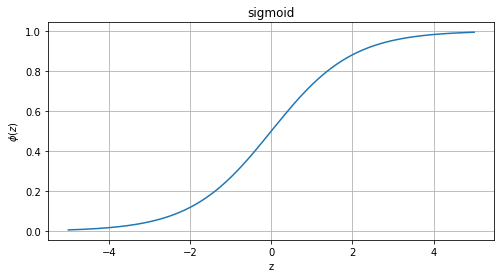

In [ ]:
z = np.arange(-5, 5, 0.001)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.title('sigmoid')
plt.show()

__Logistic Regression__

*   선형 회귀
$$
z_i = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + \cdots = w_0 + \sum_j x_{ij} \cdot w_j
$$

*   선형 회귀 공식으로 계산된 결과를 sigmoid 함수의 argument로 전달
$$
p_i = \phi(z_i) = \dfrac{1}{1 + e^{-z}} 
    = \dfrac{1}{1 + exp(-(w_0 + \sum_j x_{ij} \cdot w_j))}
$$

*   sigmoid 함수의 리턴값은 항상 0 ~ 1이므로, Logistic Regression은 sigmoid 함수의 리턴값을 양성이 될 확률로 해석.

## 손실 함수


*   이진 분류에서는 손실 함수 log loss가 최소가 되는 계수들을 찾는 것이 목적.
*   Logistic regression cost function(__log loss__)

>>   $ L = -[y \log{p} + (1-y) \log{(1-p)}] $

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} [y^{(i)} \log({p}^{(i)}) + (1-y^{(i)}) \log(1 - {p}^{(i)})] $

>>   N: the number of samples

*   다중 클래스 분류에서는 손실 함수 크로스 엔트로피가 최소가 되는 계수들을 찾는 것이 목적.
*   __Cross entropy__ cost function

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{m} y_{k}^{(i)} \log({p}_{k}^{(i)}) $

>>   N: the number of samples

>>   m: the number of classes


In [ ]:
samples = X_te[:5]  # 빙어(Smelt)가 될 확률을 계산하고 싶은 샘플 5개
samples_scaled = logit_model['scaler'].transform(samples)  # 스케일일된 샘플 데이터
w0 = logit_model['clf'].intercept_  # 손실함수(log loss) 최적화를 통해서 찾은 절편
w = logit_model['clf'].coef_[0]  # 손실함수(log loss) 최적화를 통해서 찾은 계수들
z = w0 + samples_scaled @ w  # 선형 회귀식
p = 1 / (1 + np.exp(-z))  # 선형 회귀 결과를 logistic 함수의 argument로 전달
p  # 샘플이 1(positive)가 될 확률.

array([2.67161624e-03, 5.57465921e-03, 5.69374399e-04, 8.97747893e-01,
       9.45743238e-01])

In [ ]:
np.c_[1-p, p]

array([[9.97328384e-01, 2.67161624e-03],
       [9.94425341e-01, 5.57465921e-03],
       [9.99430626e-01, 5.69374399e-04],
       [1.02252107e-01, 8.97747893e-01],
       [5.42567620e-02, 9.45743238e-01]])

In [ ]:
logit_model.predict_proba(X_te[:5])

array([[9.97328384e-01, 2.67161624e-03],
       [9.94425341e-01, 5.57465921e-03],
       [9.99430626e-01, 5.69374399e-04],
       [1.02252107e-01, 8.97747893e-01],
       [5.42567620e-02, 9.45743238e-01]])